In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 


In [ ]:
 load_and_process_data_to_df(fileinput, lat, lon, month=7):

In [37]:
# Function to load data, process it, and convert to DataFrame for a specific lat/lon
def load_and_process_data_to_df(fileinput, lat, lon, month=7):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Calculate the nearest grid point indices
    abs_diff_lat = np.abs(ds.latitude[:, 0].values - lat)
    abs_diff_lon = np.abs(ds.longitude[0, :].values - lon)
    lat_idx = abs_diff_lat.argmin().item()
    lon_idx = abs_diff_lon.argmin().item()

    print(lon_idx,lat_idx)
    
    # Select data only for the specified month
    monthly_data = ds.sel(valid_time=ds.valid_time.dt.month == month)

    # Extract values at the nearest grid point
    data_at_point = monthly_data.isel(x=lon_idx, y=lat_idx)

    # Convert the data at the nearest grid point to a DataFrame
    df = data_at_point.to_dataframe().reset_index()

    return df

# Function to load and merge multiple files into a single DataFrame
def load_and_merge_files(file_list, lat, lon, month=7):
    data_frames = []
    
    for file in file_list:
        df = load_and_process_data_to_df(file, lat, lon, month)
        data_frames.append(df)
    
    # Concatenate all the data frames into one
    merged_df = pd.concat(data_frames, ignore_index=True)
    
    return merged_df

In [13]:
ds = xr.open_dataset(fileinput)
print(ds)

NameError: name 'fileinput' is not defined

In [38]:

# Example usage
file_list = sorted(glob.glob('/data/IMFSE/PythonCourse/CDS/CERRA/cerra*.nc'))
'''
['/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2000.nc', 
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2001.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2002.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2003.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2004.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2005.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2006.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2007.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2008.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2009.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2010.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2011.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2012.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2013.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2014.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2015.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2016.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2017.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2018.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2019.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2020.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2021.nc'
]
'''

lat = 41.709377863541654
lon = 1.892273844304144

# Load and merge data from all files for July
merged_data = load_and_merge_files(file_list, lat, lon)

# Display the merged DataFrame
print(merged_data)

# If you want to save the merged dataframe to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
411 499
              valid_time  latitude  longitude expver      wdir10      si10  \
0    2000-07-01 00:00:00  47.89917  -1.090566   prod  250.703400  2.623460   
1    2000-07-01 06:00:00  47.89917  -1.090566   prod  203.195374  2.871353   
2    2000-07-01 12:00:00  47.89917  -1.090566   prod  216.039597  4.154931   
3    2000-07-01 18:00:00  47.89917  -1.090566   prod  238.953476  4.594299   
4    2000-07-02 00:00:00  47.89917  -1.090566   prod  248.671875  1.979007   
...                  ...       ...        ...    ...         ...       ...   
2723 2021-07-30 18:00:00  47.89917  -1.090566   prod  250.453506  7.346303   
2724 2021-07-31 00:00:00  47.89917  -1.090566   prod  289.179718  2.169646   
2725 2021-07-31 06:00:00  47.89917  -1.090566   prod  262.742676  3.036371   
2726 2021-07-31 12:00:00  47.89917  -1.09056

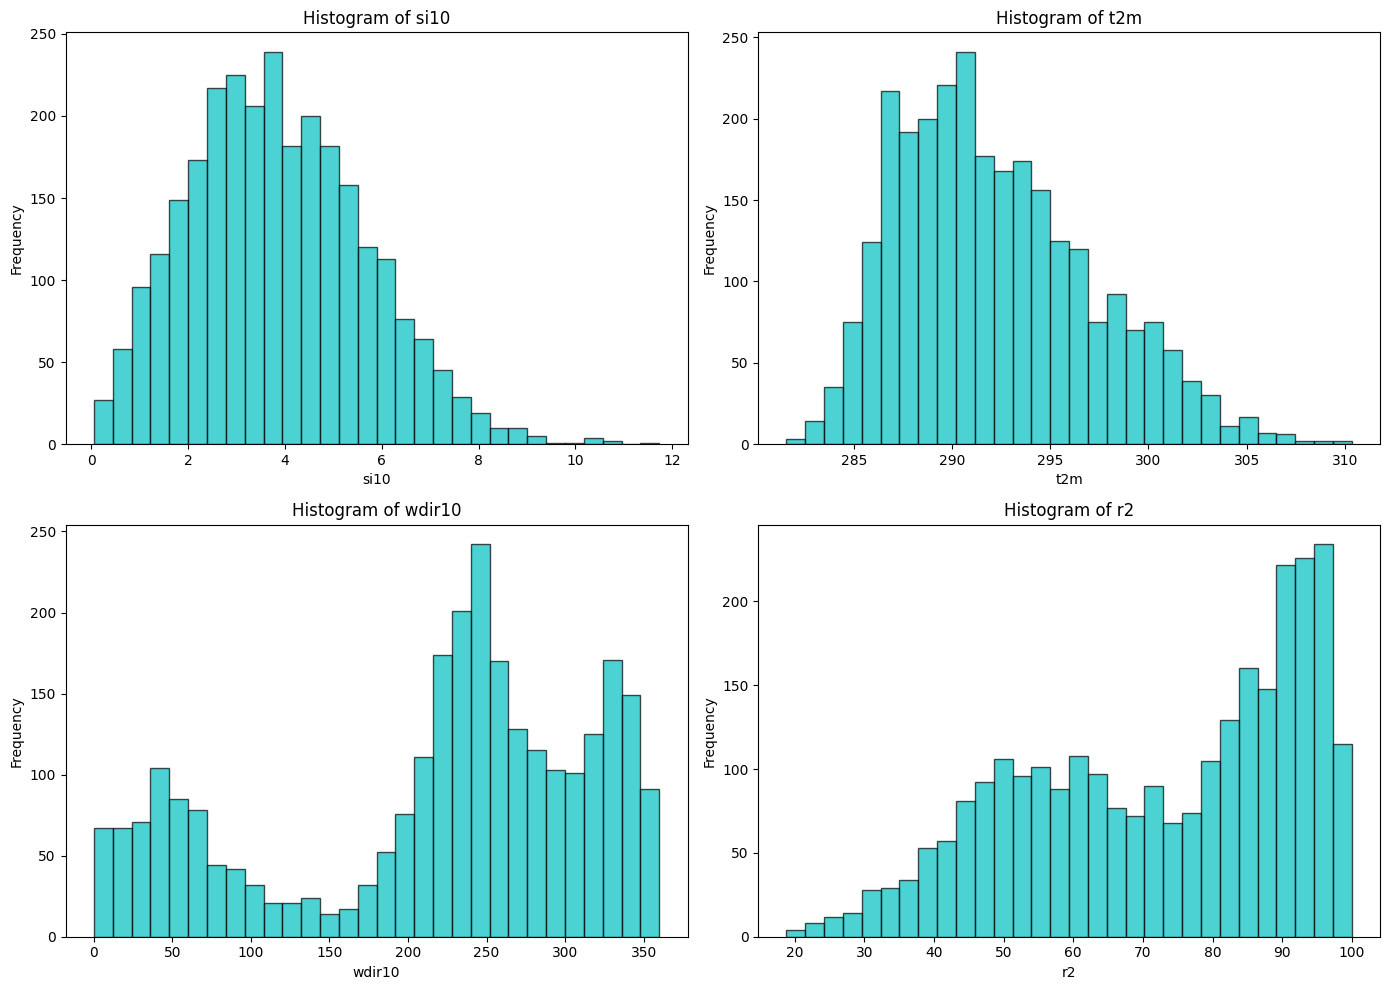

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot histograms for the selected parameters
def plot_histograms(df, parameters):
    plt.figure(figsize=(14, 10))
    
    # Loop over the parameters and create subplots
    for i, param in enumerate(parameters, 1):
        plt.subplot(2, 2, i)  # 2 rows, 2 columns for 4 plots
        plt.hist(df[param].dropna(), bins=30, color='c', edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {param}')
        plt.xlabel(param)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_plot = ['si10', 't2m', 'wdir10', 'r2']

# Plot the histograms
plot_histograms(merged_data, parameters_to_plot)

In [5]:
# Function to calculate statistics for selected parameters
def calculate_statistics(df, parameters):
    stats = {}
    
    for param in parameters:
        min_val = df[param].min()
        max_val = df[param].max()
        std_val = df[param].std()
        
        stats[param] = {
            'min': min_val,
            'max': max_val,
            'std': std_val
        }
    
    return pd.DataFrame(stats)

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_analyze = ['si10', 't2m', 'wdir10', 'r2']

# Calculate statistics for the parameters
statistics = calculate_statistics(merged_data, parameters_to_analyze)

# Display the statistics
print(statistics)

          si10         t2m      wdir10          r2
min   0.059785  281.572632    0.093877   18.783203
max  11.728673  310.344482  359.945496  100.000961
std   1.819511    4.918058  101.984047   19.930359


              valid_time   latitude  longitude expver      wdir10      si10  \
0    2000-07-01 00:00:00  63.769514  74.105082   prod  258.398712  3.213548   
1    2000-07-01 06:00:00  63.769514  74.105082   prod  302.203186  6.010513   
2    2000-07-01 12:00:00  63.769514  74.105082   prod  334.008331  6.065820   
3    2000-07-01 18:00:00  63.769514  74.105082   prod  343.086273  2.410949   
4    2000-07-02 00:00:00  63.769514  74.105082   prod  317.203125  4.206058   
...                  ...        ...        ...    ...         ...       ...   
2723 2021-07-30 18:00:00  63.769514  74.105082   prod  172.359756  2.811147   
2724 2021-07-31 00:00:00  63.769514  74.105082   prod  178.242218  2.899627   
2725 2021-07-31 06:00:00  63.769514  74.105082   prod  193.664551  3.911859   
2726 2021-07-31 12:00:00  63.769514  74.105082   prod  251.921906  2.874640   
2727 2021-07-31 18:00:00  63.769514  74.105082   prod  242.039719  1.664673   

             r2         t2m  
0     80.841393  285.

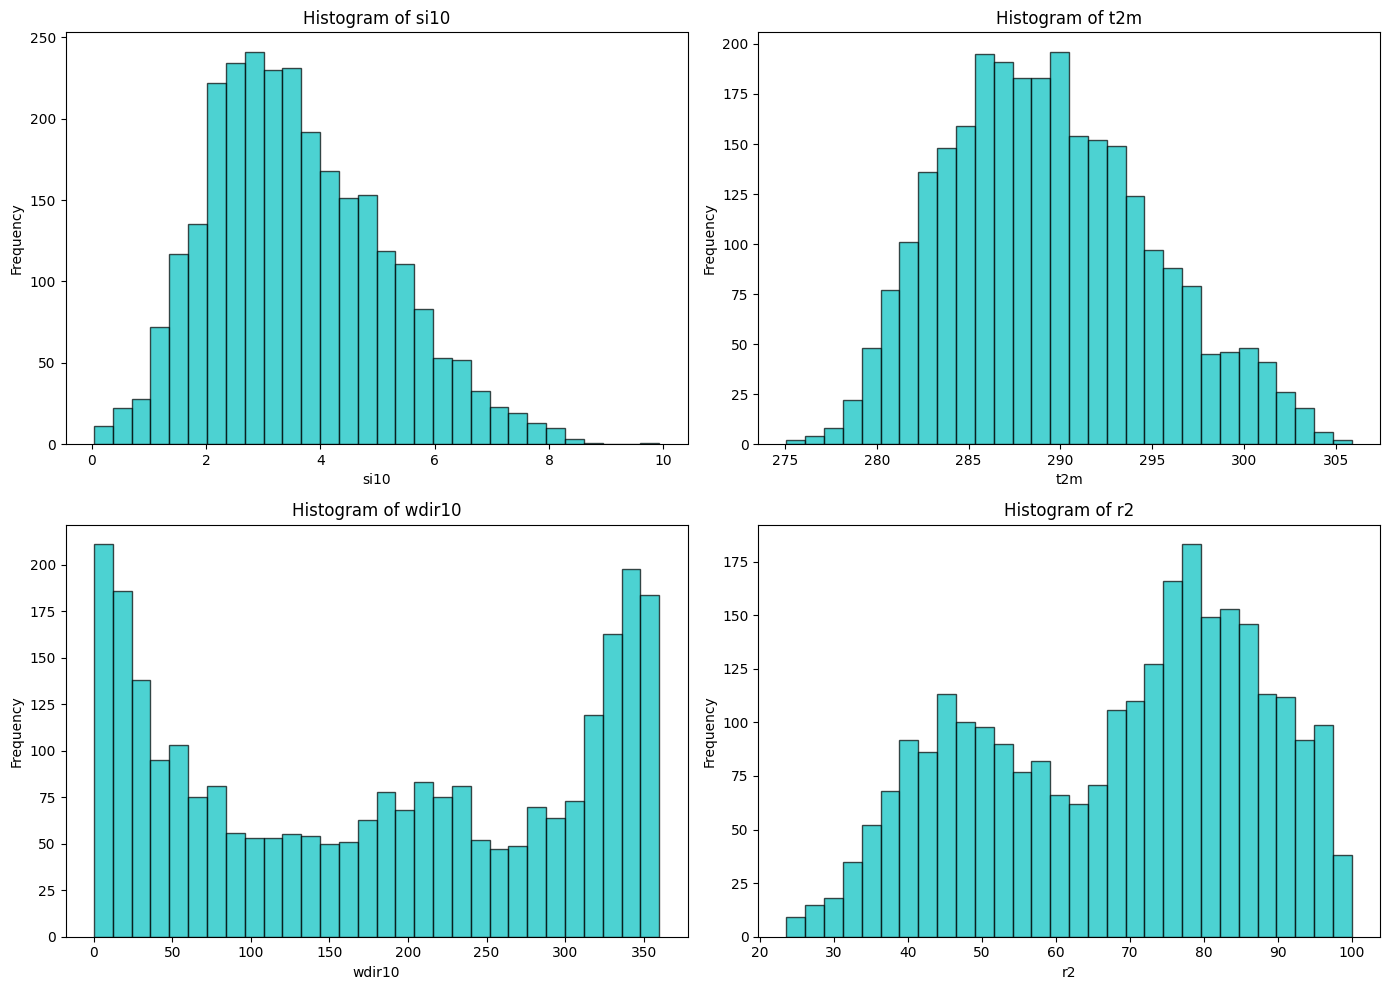

         si10         t2m      wdir10          r2
min  0.038669  275.075958    0.070319   23.617188
max  9.929699  305.864532  359.859772  100.000328
std  1.543457    5.606388  123.687477   18.737127


In [15]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Function to load data, process it, and convert to DataFrame for a specific lat/lon
def load_and_process_data_to_df(fileinput, lat, lon, month=7):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Get latitude and longitude values from the dataset
    latitudes = ds['latitude'].values
    longitudes = ds['longitude'].values
    
    # Calculate the nearest grid point indices
    abs_diff_lat = np.abs(latitudes - lat)  # Adjust based on actual variable name
    abs_diff_lon = np.abs(longitudes - lon)  # Adjust based on actual variable name
    
    lat_idx = np.clip(abs_diff_lat.argmin(), 0, latitudes.shape[0] - 1)  # Clamp index to valid range
    lon_idx = np.clip(abs_diff_lon.argmin(), 0, longitudes.shape[0] - 1)  # Clamp index to valid range

    # Select data only for the specified month (adjust the time variable as needed)
    if 'valid_time' in ds:
        time_var = 'valid_time'
    else:
        time_var = 'time'
    
    # Filter by month
    monthly_data = ds.sel({time_var: ds[time_var].dt.month == month})

    # Extract values at the nearest grid point
    data_at_point = monthly_data.isel(x=lon_idx, y=lat_idx)

    # Convert the data at the nearest grid point to a DataFrame
    df = data_at_point.to_dataframe().reset_index()

    return df

# Function to load and merge multiple files into a single DataFrame
def load_and_merge_files(file_list, lat, lon, month=7):
    data_frames = []
    
    for file in file_list:
        df = load_and_process_data_to_df(file, lat, lon, month)
        data_frames.append(df)
    
    # Concatenate all the data frames into one
    merged_df = pd.concat(data_frames, ignore_index=True)
    
    return merged_df

# Example usage
file_list = sorted(glob.glob('/data/IMFSE/PythonCourse/CDS/CERRA/cerra*.nc'))

lat = 41.709377863541654
lon = 1.892273844304144

# Load and merge data from all files for July
merged_data = load_and_merge_files(file_list, lat, lon)

# Display the merged DataFrame
print(merged_data)

# Save the merged dataframe to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

# Function to plot histograms for the selected parameters
def plot_histograms(df, parameters):
    plt.figure(figsize=(14, 10))
    
    # Loop over the parameters and create subplots
    for i, param in enumerate(parameters, 1):
        plt.subplot(2, 2, i)  # 2 rows, 2 columns for 4 plots
        plt.hist(df[param].dropna(), bins=30, color='c', edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {param}')
        plt.xlabel(param)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_plot = ['si10', 't2m', 'wdir10', 'r2']

# Plot the histograms
plot_histograms(merged_data, parameters_to_plot)

# Function to calculate statistics for selected parameters
def calculate_statistics(df, parameters):
    stats = {}
    
    for param in parameters:
        min_val = df[param].min()
        max_val = df[param].max()
        std_val = df[param].std()
        
        stats[param] = {
            'min': min_val,
            'max': max_val,
            'std': std_val
        }
    
    return pd.DataFrame(stats)

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_analyze = ['si10', 't2m', 'wdir10', 'r2']

# Calculate statistics for the parameters
statistics = calculate_statistics(merged_data, parameters_to_analyze)

# Display the statistics
print(statistics)



Nearest latitude: 41.70933390874473, Nearest longitude: 1.8922790245704362


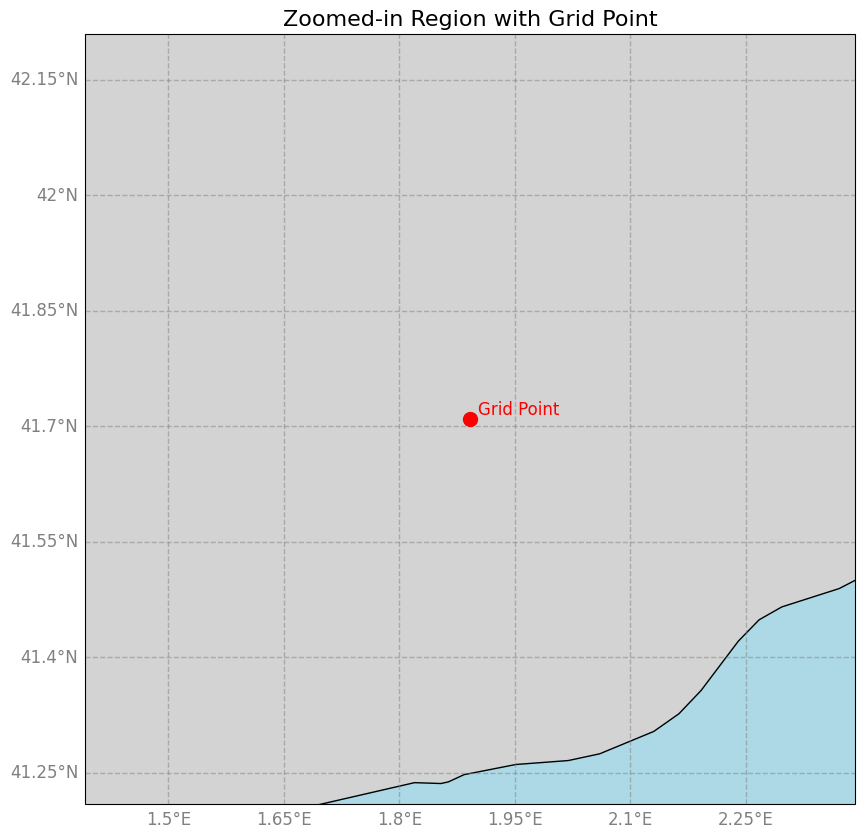

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Step 1: Load the dataset and calculate the nearest grid point

def get_nearest_grid_point(fileinput, input_lat, input_lon):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Extract the latitude and longitude values from the dataset
    latitudes = ds['latitude'].values
    longitudes = ds['longitude'].values
    
    # If lat/lon are 2D, flatten them to calculate the nearest grid point
    if len(latitudes.shape) > 1 or len(longitudes.shape) > 1:
        latitudes = latitudes.flatten()
        longitudes = longitudes.flatten()

    # Calculate the nearest grid point indices
    abs_diff_lat = np.abs(latitudes - input_lat)
    abs_diff_lon = np.abs(longitudes - input_lon)

    # Find the nearest index for both latitude and longitude
    lat_idx = abs_diff_lat.argmin().item()
    lon_idx = abs_diff_lon.argmin().item()

    # Get the nearest grid point latitude and longitude
    nearest_lat = latitudes[lat_idx]
    nearest_lon = longitudes[lon_idx]

    print(f"Nearest latitude: {nearest_lat}, Nearest longitude: {nearest_lon}")
    return nearest_lat, nearest_lon

# Step 2: Plot the nearest grid point on a local map using Cartopy

def plot_local_map(latitude, longitude):
    # Set up the plot with Cartopy projection
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set the extent of the map (this will zoom into the area around the lat/lon)
    ax.set_extent([longitude - 0.5, longitude + 0.5, latitude - 0.5, latitude + 0.5], crs=ccrs.PlateCarree())
    
    # Add features: coastlines, borders, land, and ocean
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.add_feature(cfeature.OCEAN, color='lightblue')

    # Add gridlines with labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}
    
    # Plot the nearest grid point as a red dot on the map
    plt.plot(longitude, latitude, 'ro', markersize=10, label="Nearest Grid Point")
    
    # Add a label for the grid point
    plt.text(longitude + 0.01, latitude, 'Grid Point', color='red', fontsize=12, verticalalignment='bottom')
    
    # Add title
    plt.title('Zoomed-in Region with Grid Point', fontsize=16)

    # Show the map
    plt.show()

# Example usage:

# Provide the file path (change to the correct path for your data)
fileinput = '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2000.nc'

# Input latitude and longitude from your code
input_lat = 41.709377863541654
input_lon = 1.892273844304144

# Step 3: Get the nearest grid point coordinates
nearest_lat, nearest_lon = get_nearest_grid_point(fileinput, input_lat, input_lon)

# Step 4: Plot the nearest grid point on a local map
plot_local_map(nearest_lat, nearest_lon)


In [24]:
fileinput=  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2006.nc'
ds = xr.open_dataset(fileinput)

In [27]:
ds

<xarray.Dataset> Size: 27GB
Dimensions:     (valid_time: 1460, y: 1069, x: 1069)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 12kB 2006-01-01 ... 2006-12-31T18...
    latitude    (y, x) float64 9MB ...
    longitude   (y, x) float64 9MB ...
    expver      (valid_time) <U4 23kB ...
Dimensions without coordinates: y, x
Data variables:
    wdir10      (valid_time, y, x) float32 7GB ...
    si10        (valid_time, y, x) float32 7GB ...
    r2          (valid_time, y, x) float32 7GB ...
    t2m         (valid_time, y, x) float32 7GB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2024-08-12T16:58 GRIB to CDM+CF via cfgrib-0.9.1...

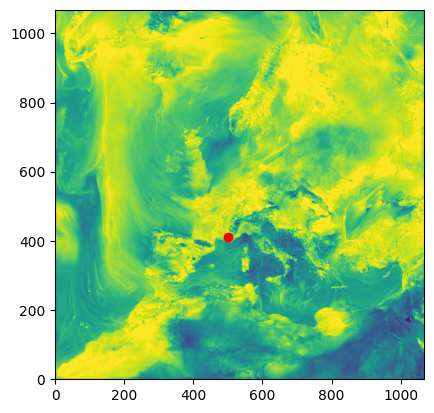

In [40]:
plt.imshow(ds['r2'][100].values,origin='lower')
plt.scatter(499,411,c='r')